In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm
from scipy.linalg import solve

In [3]:
%matplotlib inline

# Symbols

\$T = \$ expiration time \
\$S = \$ stock price \
\$K = \$ strike \
\$r = \$ risk free rate \
\$q = \$ dividend yield \
\$\mu = \$ expected return (constant)\
\$\sigma = \$ volatility (constant)

# zero volatility

\$ \rm{d}S = \mu S \rm{d}t \$ \
\$ S_T = S_0 \rm{e}^{\mu T} \quad\textit{or}\quad \ln{S_t} = \ln{S_0} + \mu T\$

# not zero volatility
\$ \rm{d}S = \mu S \rm{d}t + S\sigma \rm{d}W(t)\$ \
\$ S_T = S_0 \rm{e}^{\big(\mu - \frac{\sigma^2}{2}\big)T  + \sigma\sqrt{T} \cdot z} \quad\textit{or}\quad \ln{S_t} = \ln{S_0} + {\big(\mu - \frac{\sigma^2}{2}\big)T  + \sigma\sqrt{T} \cdot z} \$

In [4]:
S0 = 100.0
K = 110.0
t0 = 0.0
T = 0.2
r = 0.05
q = 0.02
sigma = 0.25

In [5]:
mu = r - q

# Black–Scholes Formula

In [6]:
dt = T - t0
sqrt_dt = np.sqrt(dt)
sigma_sqrt_dt = sigma * sqrt_dt

d1 = (np.log(S0/K) + (r - q + 0.5 * (sigma * sigma)) * dt) / sigma_sqrt_dt
d2 = d1 - sigma_sqrt_dt

F =  S0 * np.exp((r - q) * dt)

callPriceBS = np.exp(-r * dt) * ((F * norm.cdf(d1)) - (K * norm.cdf(d2)))
    
# 
callPriceBS

1.4013574261946238

# MonteCarlo Mothod

In [7]:
# MonteCarlo method prms
nSteps = 1
nPaths = 10000000

def EuropeanCallOptionMC(nSteps, nPaths):
    """ Compute an European Call Option using Monte-Carlo Method
        
        Args:
            nSteps(int): number of time steps 
            nPaths(int): number of paths
    """
    dt = (T - t0) / nSteps
    sqrt_dt = np.sqrt(dt)

    # random number using N(0, 1)
    phi = np.random.normal(size=(nSteps, nPaths)) * sqrt_dt

    lnS0 = math.log(S0)
    lnST = lnS0

    # Evolve paths:
    for t in range(nSteps):
        lnST += ((mu - 0.5 * (sigma*sigma)) * dt) + (sigma * phi[t])
    ST = np.exp(lnST)

    # European Call option:
    callPriceMC = math.exp(-r * T) * np.mean(np.maximum(ST - K, 0.0))
    
    # 
    return callPriceMC

res = [(2**i, EuropeanCallOptionMC(nSteps, 2**i)) for i in range(6, 25)]
x, y = list(zip(*res))

# MC Convergence

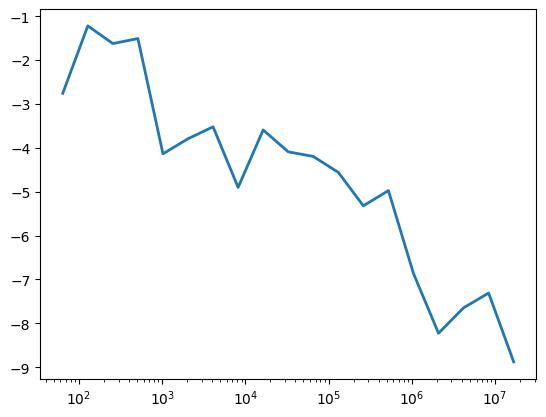

In [8]:
y = np.log(np.abs(y - callPriceBS))

plt.plot(x, y, linewidth=2.0)
plt.xscale('log')

plt.show()